# Vehicle body type & violation code-Barchart

In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

# Import input data file

In [2]:
#Read the csv file
df=pd.read_csv("Resources\Parkingtickets_Dec2016.csv")
df

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Violation Post Code,Violation Description
0,GYG8911,NY,PAS,12/18/2016,24,SUBN,JEEP,1204P,Q,NaN,NaN,BK,2015,NaN,15 4,24-No Parking (exc auth veh)
1,8P82H,NY,OMT,12/21/2016,14,TAXI,NISSA,1015A,NY,ALL,ALL,YELLO,2014,-,NaN,NaN
2,GML6346,NY,PAS,12/19/2016,21,SDN,HONDA,1212P,K,1130A,0100A,GREY,2013,-,NaN,NaN
3,12203MG,NY,COM,12/1/2016,46,VAN,FRUEH,1137A,NY,ALL,ALL,BROWN,2015,-,NaN,NaN
4,HEG7444,NY,PAS,12/1/2016,36,4DSD,BMW,1027A,BK,NaN,NaN,BK,2016,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30908,GCV1621,PA,PAS,12/25/2016,7,SDN,NISSA,0232P,QN,NaN,NaN,NaN,2014,NaN,NaN,FAILURE TO STOP AT RED LIGHT
30909,GVH3100,NY,PAS,12/5/2016,21,SUBN,FORD,0837A,Q,0830A,0900A,BK,2013,NaN,07 4,21-No Parking (street clean)
30910,GZK6941,NY,PAS,12/2/2016,36,4DSD,INFIN,0424P,QN,NaN,NaN,WH,2015,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION
30911,GCL2009,NY,PAS,12/29/2016,7,SUBN,NISSA,1004A,QN,NaN,NaN,BK,2015,NaN,NaN,FAILURE TO STOP AT RED LIGHT


# Dataset Observations

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30913 entries, 0 to 30912
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Plate ID               30913 non-null  object
 1   Registration State     30913 non-null  object
 2   Plate Type             30913 non-null  object
 3   Issue Date             30913 non-null  object
 4   Violation Code         30913 non-null  int64 
 5   Vehicle Body Type      30864 non-null  object
 6   Vehicle Make           30846 non-null  object
 7   Violation Time         30913 non-null  object
 8   Violation County       30838 non-null  object
 9   From Hours In Effect   13175 non-null  object
 10  To Hours In Effect     13175 non-null  object
 11  Vehicle Color          30423 non-null  object
 12  Vehicle Year           30913 non-null  int64 
 13  Meter Number           4499 non-null   object
 14  Violation Post Code    18098 non-null  object
 15  Violation Descripti

In [4]:
#This checks for missing value in dataframe - vehicle body type has 49 missing entries
pd.isnull(df).sum()

Plate ID                     0
Registration State           0
Plate Type                   0
Issue Date                   0
Violation Code               0
Vehicle Body Type           49
Vehicle Make                67
Violation Time               0
Violation County            75
From Hours In Effect     17738
To Hours In Effect       17738
Vehicle Color              490
Vehicle Year                 0
Meter Number             26414
Violation Post Code      12815
Violation Description     2743
dtype: int64

# Data cleaning & sorting

In [5]:
#Deleted vehicles with non-NY registration.Deleted in .csv and imported the file
#Read the csv file with NY registration plate
df=pd.read_csv("Resources\ParkingticketsNY_Dec2016.csv")
df

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Violation Post Code,Violation Description
0,GYG8911,NY,PAS,12/18/2016,24,SUBN,JEEP,1204P,Q,NaN,NaN,BK,2015,NaN,15 4,24-No Parking (exc auth veh)
1,8P82H,NY,OMT,12/21/2016,14,TAXI,NISSA,1015A,NY,ALL,ALL,YELLO,2014,-,NaN,NaN
2,GML6346,NY,PAS,12/19/2016,21,SDN,HONDA,1212P,K,1130A,0100A,GREY,2013,-,NaN,NaN
3,12203MG,NY,COM,12/1/2016,46,VAN,FRUEH,1137A,NY,ALL,ALL,BROWN,2015,-,NaN,NaN
4,HEG7444,NY,PAS,12/1/2016,36,4DSD,BMW,1027A,BK,NaN,NaN,BK,2016,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29346,GXN1964,NY,OMS,12/8/2016,36,SUBN,DODGE,1028A,BX,NaN,NaN,GY,2015,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION
29347,GVH3100,NY,PAS,12/5/2016,21,SUBN,FORD,0837A,Q,0830A,0900A,BK,2013,NaN,07 4,21-No Parking (street clean)
29348,GZK6941,NY,PAS,12/2/2016,36,4DSD,INFIN,0424P,QN,NaN,NaN,WH,2015,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION
29349,GCL2009,NY,PAS,12/29/2016,7,SUBN,NISSA,1004A,QN,NaN,NaN,BK,2015,NaN,NaN,FAILURE TO STOP AT RED LIGHT


In [6]:
#Deleting unwanted column from df
del df['From Hours In Effect']
df.head()

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Violation Post Code,Violation Description
0,GYG8911,NY,PAS,12/18/2016,24,SUBN,JEEP,1204P,Q,NaN,BK,2015,NaN,15 4,24-No Parking (exc auth veh)
1,8P82H,NY,OMT,12/21/2016,14,TAXI,NISSA,1015A,NY,ALL,YELLO,2014,-,NaN,NaN
2,GML6346,NY,PAS,12/19/2016,21,SDN,HONDA,1212P,K,0100A,GREY,2013,-,NaN,NaN
3,12203MG,NY,COM,12/1/2016,46,VAN,FRUEH,1137A,NY,ALL,BROWN,2015,-,NaN,NaN
4,HEG7444,NY,PAS,12/1/2016,36,4DSD,BMW,1027A,BK,NaN,BK,2016,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION


In [7]:
#Deleting unwanted column from df
del df['To Hours In Effect']
df.head()

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Vehicle Color,Vehicle Year,Meter Number,Violation Post Code,Violation Description
0,GYG8911,NY,PAS,12/18/2016,24,SUBN,JEEP,1204P,Q,BK,2015,NaN,15 4,24-No Parking (exc auth veh)
1,8P82H,NY,OMT,12/21/2016,14,TAXI,NISSA,1015A,NY,YELLO,2014,-,NaN,NaN
2,GML6346,NY,PAS,12/19/2016,21,SDN,HONDA,1212P,K,GREY,2013,-,NaN,NaN
3,12203MG,NY,COM,12/1/2016,46,VAN,FRUEH,1137A,NY,BROWN,2015,-,NaN,NaN
4,HEG7444,NY,PAS,12/1/2016,36,4DSD,BMW,1027A,BK,BK,2016,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION


In [8]:
#Dropping unwanted columns from df
vb=df.drop(['Registration State', 'Plate Type', 'Issue Date', 'Vehicle Make','Violation Time','Violation County','Vehicle Color', 'Vehicle Year','Meter Number','Violation Post Code', 'Violation Description'], axis=1)
vb

,Plate ID,Violation Code,Vehicle Body Type
0,GYG8911,24,SUBN
1,8P82H,14,TAXI
2,GML6346,21,SDN
3,12203MG,46,VAN
4,HEG7444,36,4DSD
...,...,...,...
29346,GXN1964,36,SUBN
29347,GVH3100,21,SUBN
29348,GZK6941,36,4DSD
29349,GCL2009,7,SUBN


In [9]:
#Dropped empty rows
vb=vb.dropna()

In [10]:
#Combined few body types using https://www.dmv.ca.gov/portal/handbook/vehicle-industry-registration-procedures-manual-2/inquiries/chart-1-body-type-model-and-body-type-codes/as reference
vb['Vehicle Body Type']=vb['Vehicle Body Type'].replace(['2 DR','2D','2DSD','2S'],'2DR')
vb['Vehicle Body Type']=vb['Vehicle Body Type'].replace(['4 DO', '4 DR', '4D', '4D H', '4DSD', '4DSE','4DSW','4H','4S','4SLE','4W'], '4DR')
vb

C:\Users\hrish\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hrish\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Plate ID,Violation Code,Vehicle Body Type
0,GYG8911,24,SUBN
1,8P82H,14,TAXI
2,GML6346,21,SDN
3,12203MG,46,VAN
4,HEG7444,36,4DR
...,...,...,...
29346,GXN1964,36,SUBN
29347,GVH3100,21,SUBN
29348,GZK6941,36,4DR
29349,GCL2009,7,SUBN


In [11]:
#Groupby vehicle body type
vb_type = vb.groupby(["Vehicle Body Type"]).count()["Violation Code"]
#vb_type

#Convert the Groupby Object to a Data Frame
vb_type = pd.DataFrame(vb_type)
vb_type

#Change the name of the column to Total Violations for more accuracy
vb_type.columns = ["Total Violations"]

total = vb_type["Total Violations"]

vb_type["Percentage of Violations"] = ((total / total.sum()) * 100)

#Reset The Index
vb_type = vb_type.reset_index()

vb_type

,Vehicle Body Type,Total Violations,Percentage of Violations
0,2DR,705,2.404174
1,4DR,9642,32.880917
2,A,1,0.003410
3,BOAT,3,0.010231
4,BS,2,0.006820
...,...,...,...
57,VAN,2908,9.916792
58,WAG,3,0.010231
59,WAGO,1,0.003410
60,WDOO,1,0.003410


In [24]:
#Clean up the new dataframe to display all vehicle makes with less than 1% of the total violations to be 
#in a group called "Other" and add them up from there
addOther_df = vb_type.loc[vb_type["Percentage of Violations"] < 1]
others_df = vb_type.loc[vb_type["Percentage of Violations"] < 1]

#Save the DataFrame to a csv file for potential later use, while still having each vehicle make name still there.
others_df.to_csv("Output/OtherDataFrame.csv")

others_df["Vehicle Body Type"] = "Other"
others_df

C:\Users\hrish\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Vehicle Body Type,Total Violations,Percentage of Violations
2,Other,1,0.003410
3,Other,3,0.010231
4,Other,2,0.006820
5,Other,47,0.160278
6,Other,100,0.341018
8,Other,11,0.037512
9,Other,16,0.054563
10,Other,16,0.054563
11,Other,4,0.013641
12,Other,1,0.003410


In [13]:
#Add up all cell values of "Other" to create a single entity
addOtherTotal = addOther_df["Total Violations"].sum()
addOtherTotal

879

In [14]:
#New df that contains vehicle body type with greater than 1 % violations
newvb_type = vb_type.loc[vb_type["Percentage of Violations"] >= 1]
newvb_type

,Vehicle Body Type,Total Violations,Percentage of Violations
0,2DR,705,2.404174
1,4DR,9642,32.880917
7,DELV,689,2.349611
22,PICK,653,2.226845
29,SDN,1041,3.549993
35,SUBN,12421,42.357796
41,TAXI,386,1.316328
57,VAN,2908,9.916792


In [37]:
#Sort in descending Order
newvb_type = newvb_type.sort_values(by = "Percentage of Violations", ascending = False)

#Add an "Expected" Column
newvb_type["Expected Violations"] = newvb_type["Total Violations"].sum() / len(newvb_type)
newvb_type

,Vehicle Body Type,Total Violations,Percentage of Violations,Expected Violations
5,SUBN,12421,42.357796,3258.222222
1,4DR,9642,32.880917,3258.222222
7,VAN,2908,9.916792,3258.222222
4,SDN,1041,3.549993,3258.222222
8,Other,879,2.997545,3258.222222
0,2DR,705,2.404174,3258.222222
2,DELV,689,2.349611,3258.222222
3,PICK,653,2.226845,3258.222222
6,TAXI,386,1.316328,3258.222222


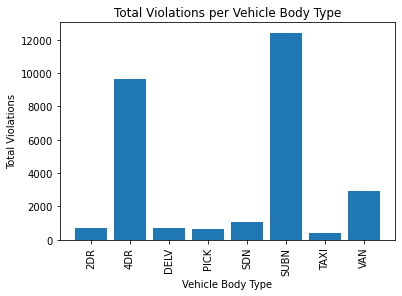

In [15]:
#Plot a bar graph with how many violations each vehicle make receives
barGraph = plt.bar(newvb_type["Vehicle Body Type"], newvb_type["Total Violations"],align = "center")

#format the bar
plt.title("Total Violations per Vehicle Body Type")
plt.xlabel("Vehicle Body Type")
plt.ylabel("Total Violations")
plt.xticks(rotation = "vertical")

#Save the Graph
plt.savefig("Output/TotalViolations_per_BodyType")

In [38]:
#Calculate the Chi Square value to see if the data is significant
#Display the critical value
criticalValue = stats.chi2.ppf(q = 0.95, df = len(newvb_type) - 1)
criticalValue

15.50731305586545

In [39]:
#Get the Chi Square Value 
stats.chisquare(newvb_type["Total Violations"], newvb_type["Expected Violations"])

Power_divergenceResult(statistic=50200.760537443726, pvalue=0.0)